In [1]:
# Importa las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import files

# Sube el archivo CSV manualmente
uploaded = files.upload()

# Carga los datos
df = pd.read_csv("netflix_titles.csv")

# Muestra las primeras filas
df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Ver información general
df.info()

# Verifica valores nulos
print(df.isnull().sum())

# Ver estadísticas generales
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
# Elimina columnas irrelevantes
columns_to_drop = ['show_id', 'description']
df = df.drop(columns=columns_to_drop)

# Rellena valores nulos con "Desconocido"
df.fillna("Desconocido", inplace=True)

# Convierte "date_added" a formato de fecha
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Confirma limpieza
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8709 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 688.2+ KB


<ipython-input-5-e0736f8bf63e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="coolwarm")


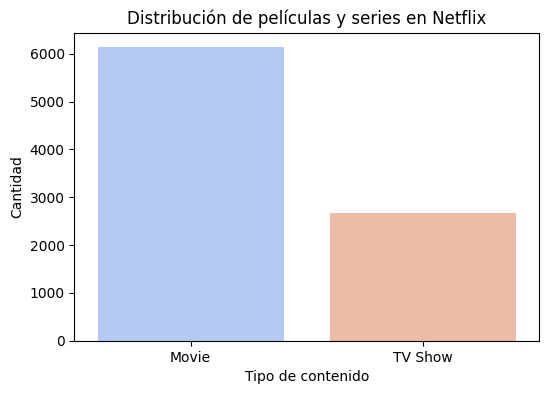

In [5]:
# Películas vs. Series
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="coolwarm")
plt.title("Distribución de películas y series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()

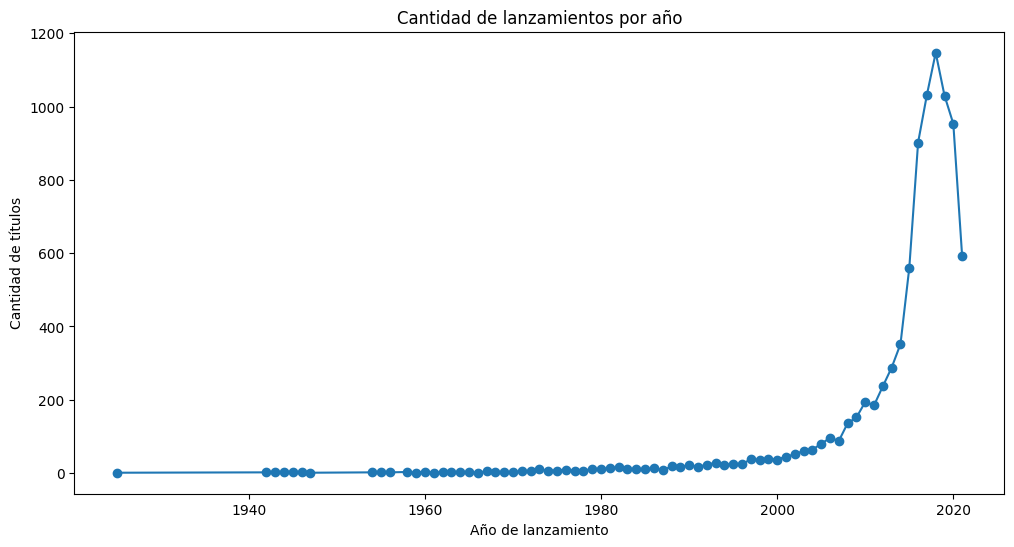

In [6]:
# Tendencia de lanzamientos por año
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Cantidad de lanzamientos por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()

<ipython-input-7-f4c2ad72ce73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


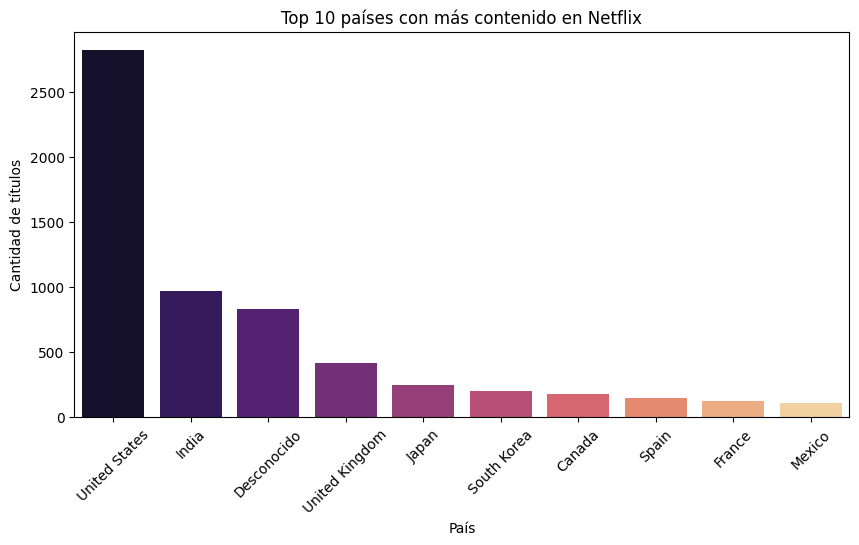

In [7]:
# Países con más contenido en Netflix
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 países con más contenido en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.show()

<ipython-input-8-120e4684dcdf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette="coolwarm")


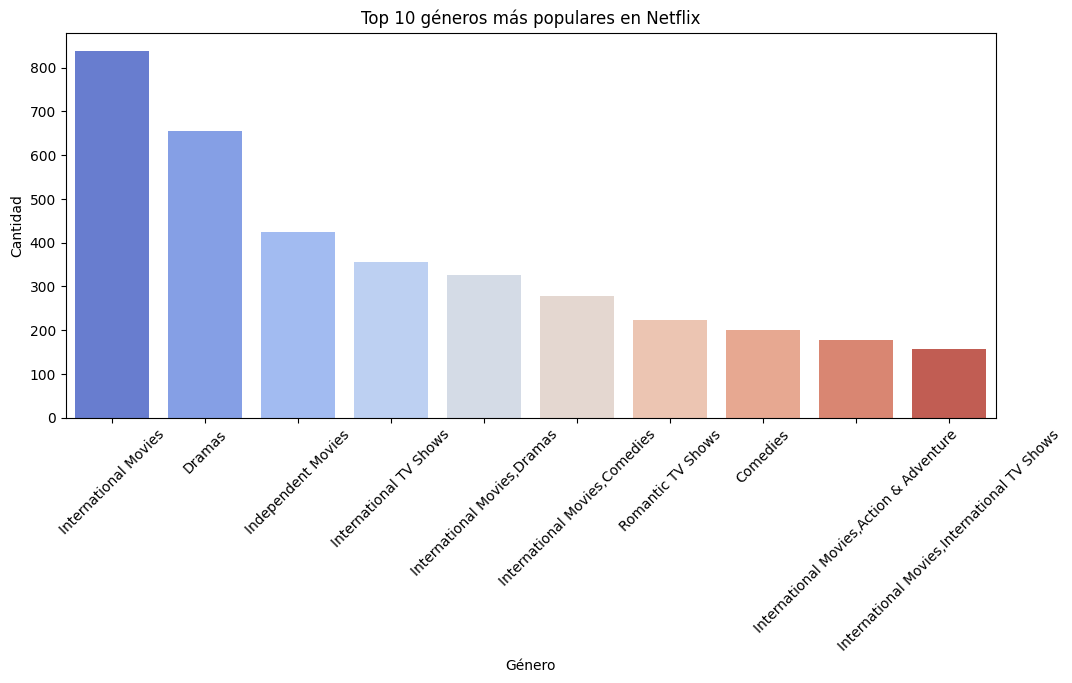

In [8]:
# Géneros más populares
# Divide géneros y cuenta su frecuencia
from collections import Counter
all_genres = ",".join(df["listed_in"]).split(", ")
genre_counts = Counter(all_genres)

# Toma los 10 más comunes
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(12,5))
sns.barplot(x=list(genres), y=list(counts), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 géneros más populares en Netflix")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

# Modelo de Clasificación: Película vs. Serie

In [9]:
# Convierte la duración a numérica (elimina "min" y "Season" en las series)
df["duration"] = df["duration"].str.extract("(\d+)").astype(float)

# Reemplaza NaN con la media
df["duration"].fillna(df["duration"].mean(), inplace=True)

# Crea variables numéricas
df["type"] = df["type"].map({"Movie": 0, "TV Show": 1})

# Selecciona características y etiquetas
X = df[["release_year", "duration"]]
y = df["type"]

# Divide datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hace predicciones
y_pred = model.predict(X_test)

# Evalua el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

<ipython-input-9-b12fb7a67833>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].fillna(df["duration"].mean(), inplace=True)


Precisión del modelo: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762

